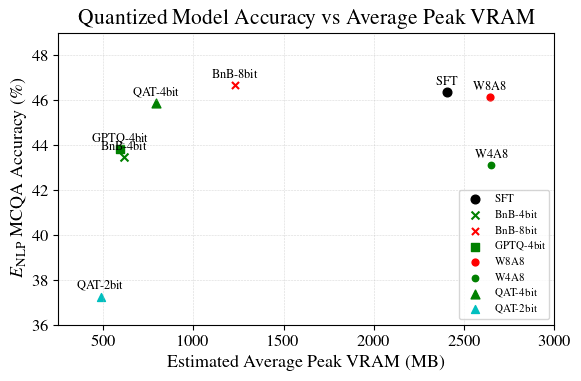

In [13]:
import json
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib as mpl

# Enable LaTeX rendering
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],  # match ACL2023
    "axes.labelsize": 13,  # adjust sizes as in your paper
    "font.size": 13,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "text.latex.preamble": r"\usepackage{amsmath}"
})

# Load data
with open("Results/all.json", "r") as f:
    results = json.load(f)

# Mapping model → (label, color, marker)
model_map = {
    "SFT Model": ("SFT", 'black', 'o'),
    "BnB 4-bit Model": ("BnB-4bit", 'g', 'x'),
    "BnB 8-bit Model": ("BnB-8bit", 'r', 'x'),
     "GPTQ 4bit calib200": ("GPTQ-4bit", 'g', 's'),
    "SmoothQuant W8A8 calib200": ("W8A8", 'r', 'o'),
    "SmoothQuant W4A8 calib200": ("W4A8", 'g', 'o'),
    "QAT-W4G64": ("QAT-4bit", 'g', '^'),
    "QAT-W2G64": ("QAT-2bit", 'c', '^'),
}

# Plot
plt.figure(figsize=(6, 4))

max_tok_s = max(r["tokens_per_s"] for r in results.values())

for key, (label, color, marker) in model_map.items():
    entry = results[key]
    acc = entry["accuracy"] * 100
    vram = entry["avg_peak_vram_MB"]
    tok_s = entry["tokens_per_s"]
    size = tok_s / max_tok_s * 20 + 20

    plt.scatter(vram, acc, s=size, c=color, marker=marker, label=label)
    plt.text(vram, acc + 0.2, label, fontsize=9, ha='center', va='bottom')

plt.xlabel("Estimated Average Peak VRAM (MB)")
plt.ylabel(r"$E_\text{NLP}$ MCQA Accuracy (\%)")
plt.title("Quantized Model Accuracy vs Average Peak VRAM")
plt.xlim(250, 3000)
plt.ylim(36, 49)
plt.grid(True, which='both', linestyle='--', linewidth=0.4, alpha=0.5)
plt.tight_layout()
plt.legend(loc="lower right", fontsize=8)
plt.savefig("Results/results_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()
